In [1]:
import pydot
import matplotlib.pyplot as plt
import time
import math
#import networkx as nx
#import random

# Step 1

## Uploading the data

In [2]:
def get_data(dot_file_path):
     #= 'Datasets/LesMiserables.dot'
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()
    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()
    
    node_list = [node.get_name() for node in nodes]
    edge_list = [(edge.get_source(), edge.get_destination()) for edge in edges]
    name= str(list(edges[0].get_attributes().keys())[0])
    weights = {(edge.get_source(), edge.get_destination()):float(edge.get_attributes()[name]) for edge in edges}

    return nodes,edges,node_list,edge_list,weights
ans = get_data('Datasets/LesMiserables.dot')
#nodes,edges,node_list,edge_list,weights = get_data('Datasets/LesMiserables.dot')
#print(('1','40') in edge_list)
# print(len(node_list)**3) #nodes
# print(len(edge_list))
# print(len(edge_list)*len(node_list)) #edges
# print()
# Nodes:  77 
#Edges:  254
#Total:  33982

In [3]:
ans[4][('1', '2')]

1.0

## Tree Layout

### Counting the number of children/parents for each node

In [4]:
#COUNTING THE NUMBER OF CHILD NODES FOR EACH NODE
def f_childs(file_name_name):   
    nodes = get_data(file_name_name)[0]
    edges = get_data(file_name_name)[1]
    node_child_count = {node.get_name(): 0 for node in nodes}
    node_childs = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if source in node_child_count:
            node_child_count[source] += 1 
            node_childs[source].append(destination) #comment
    return node_child_count, node_childs

#Count
#print(f_childs('Datasets/LesMiserables.dot')[0])
#print(sum(list(f_childs('Datasets/LesMiserables.dot')[0].values())))
#child_11,child_25,child_26 = f_childs('Datasets/LesMiserables.dot')[1]['11'],f_childs('Datasets/LesMiserables.dot')[1]['25'],f_childs('Datasets/LesMiserables.dot')[1]['26']
#print('CHILD')
#print('11: ',child_11)
#print('25: ',child_25)
#print('26": ',child_26)

#List      
#print(f_childs('Datasets/LesMiserables.dot')[1])

def f_parents(file_name_name):
    nodes = get_data(file_name_name)[0]
    edges = get_data(file_name_name)[1]
    node_parent_count = {node.get_name(): 0 for node in nodes}
    node_parents = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if destination in node_parent_count:
            node_parent_count[destination] += 1 
            node_parents[destination].append(source)
    return node_parent_count, node_parents

#Count
#print(f_parents('Datasets/LesMiserables.dot')[0]['11'])
#parent_27 = f_parents('Datasets/LesMiserables.dot')[1]['27']
#print("PARENT")
#print('27: ', parent_27)
#List      
#print(f_parents('Datasets/LesMiserables.dot')[1])

def f_edges(file_name):
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_edges_count = {node.get_name(): 0 for node in nodes}
    node_edges = {node.get_name(): [] for node in nodes}
    
    parents = f_parents(file_name)[1]
    childs = f_childs(file_name)[1]

    for node,l_parents in parents.items():
        for parent in l_parents:
            node_edges_count[node] +=1
            node_edges[node].append(parent)
    
    for node,l_childs in childs.items():
        for child in l_childs:
            node_edges_count[node] +=1
            node_edges[node].append(child)
    return node_edges_count,node_edges

#print(f_edges('Datasets/LesMiserables.dot')[1])
#print(f_parents('Datasets/LesMiserables.dot')[1])

#edges = f_edges('Datasets/LesMiserables.dot')
#parents = f_parents('Datasets/LesMiserables.dot')

#print(edges == parents)
#print(edges[0])

### Organizing the nodes throughout the graph, getting their coordinates for the tree layout

In [5]:
def tree_layout(file):
    total = 0
    n=0
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    #lonely_nodes_y = -4
    
    for edge in edges:
        n+=1
        l_m = []
        m=0
        #print(edge)#.get_source())
    #    print(node_childs[str(edge.get_destination())])
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        step = 3#random.choice([2,3])

        #nnodes with only one child
        if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            #random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
        
        #nodes with more than one node
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                m+=1
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
            l_m.append(m)
            total += m
        total+=n
        #elif len(node_childs[str(edge.get_source())]) == 0 and len(node_childs[str(edge.get_destination())]) == 0:
        #    node_positions[child]

        #elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
        #    child_x += 1               
        
    return node_positions,n,l_m,total

#pos,n,m,total = tree_layout('Datasets/LesMiserables.dot')
#print("Edges: ",n, '\n',"Nodes: ",m, '\n',"Total: ",total,)
#f_childs(nodes,edges)[1]['17']

### Improved version of the Tree layout

Get the nodes that have the same parent and are directly connected to each other

In [6]:
def common_parents(file_name):
    nodes,edges,node_list,edge_list,weights = get_data(file_name)
    ans = {node:[] for node in node_list}
    count = {node:0 for node in node_list}
    for edge1 in edges:
        for edge2 in edges:
            if edge1.get_source() == edge2.get_source() and edge1.get_destination() != edge2.get_destination() and (str(edge1.get_destination()),str(edge2.get_destination())) in edge_list:# and str(edge1.get_destination()) not in ans:
                #ans.append((str(edge1.get_destination()),str(edge2.get_destination())))
                #ans[edge1.get_source()] = []
                ans[edge1.get_source()].append((str(edge1.get_destination()),str(edge2.get_destination())))
   
    for node,edges in ans.items():
        for edge in edges:
            #print(edge)
            count[edge[1]] += 1
    return count

#common_parents('Datasets/LesMiserables.dot')

In [7]:
def tree_layout_improv(file):
    #returns the coordinates for each node 
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    
    for edge in edges:
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        
        #weights
        position = str(str(edge.get_attributes())).rfind(':')
        if int(position) != -1:
            w = int(str(edge.get_attributes())[position+3:-2])
            if w != 1:
                w = w/10

        #nodes with only one child
        if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            step = 3#random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
            print()
        
        #nodes with more than one node
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                step = 3#random.choice([2,3])
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
        #elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
        #    child_x += 1
                
    #correcting the child_x in cases where sibling nodes are connected to each other
    for node,count in [(node,count) for node,count in common_parents(file).items() if count != 0]:
        node_positions[node] = (node_positions[node][0]+count/3,node_positions[node][1])
    
    return node_positions

#tree_layout_improv('Datasets/LesMiserables.dot')

### Time complexity of the improved version

In [8]:
 # Record the start time

# Code to execute the algorithm
# For example:
def time_complexity(file,layout,ite):
    ans = []
    for i in range(ite):
        if layout == 'tree_layout':
            start_time = time.time() 
            result = tree_layout(file)
            end_time = time.time() 
        
        if layout == 'tree_layout_improv':
            start_time = time.time() 
            result = tree_layout_improv(file)
            end_time = time.time() 
         # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time
        ans.append(elapsed_time)
    print('In average, the layout',layout, 'takes', round(sum(ans)/len(ans), 2),'seconds to implement on the', file,'dataset.') 

#time_complexity('Datasets/LesMiserables.dot','tree_layout_improv',10)

### Plot the graph

In [9]:
#HOW TO PLOT A GENERAL GRAPH
def show_graph(file,layout,dims):
    if layout == 'tree_layout':
        node_positions = tree_layout(file)
        
    if layout == 'tree_layout_improv':
        node_positions = tree_layout_improv(file)

    if layout == 'BFS_tree':
        node_positions = BFS_tree(file)

    nodes,edges = get_data(file)[0],get_data(file)[1]
    plt.figure(figsize=(dims[0], dims[1]))

    for edge in edges:
        start_node = edge.get_source()
        end_node = edge.get_destination()
        start_pos = node_positions[start_node]
        end_pos = node_positions[end_node]

        position = str(str(edge.get_attributes())).rfind(':')
        if int(position) != -1:
            w = int(str(edge.get_attributes())[position+3:-2])
            if w != 1:
                w = w/10
        #else:
        #    w=1
        #plt.scatter([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='black', s=10, linewidths=w)
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

    for node, pos in node_positions.items():
        plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
        plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
    plt.axis('off')
    plt.gca().set_facecolor('w')
    plt.savefig(layout+'plot.png')
    plt.show()
    
#show_graph('Datasets/LesMiserables.dot','tree_layout1',(18,18))
#show_graph('Datasets/LesMiserables.dot','tree_layout_improv',(18,18))

### Bonus Task

In [10]:
#HOW TO CREATE THE DEFAULT LAYOUT
def bonus_task(file,layout):
    with open(file, 'r') as dot_file:
        dot_data = dot_file.read()

    # Create a graph object from the .dot data
    graph = pydot.graph_from_dot_data(dot_data)

    # Set the layout algorithm to "dot" (or any other supported layout type)
    graph[0].set_graph_defaults(layout=layout)
    graph[0].set_graph_defaults(layout=layout,)
    # Render the graph with Graphviz
    output_file_path = layout+'.png'
    graph[0].write_png(output_file_path)


#for layout in ["dot", "neato", "circo", "fdp", "twopi"]:
#    bonus_task('Datasets/LesMiserables.dot',layout)
#bonus_task('Datasets/LesMiserables.dot',"twopi")
#print("Graph with dot layout saved as:", output_file_path)


# Step 2

### Constructing a BFS tree

In [11]:
def BFS_tree(file,plot = 'No'):
    total = 0
    n=0
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes = set()
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    tree = {node.get_name(): [] for node in nodes}
    #lonely_nodes_y = -4
    min_y = 0

    for node in nodes:#node_childs[str(node)]:
        
        done_nodes.add(str(node.get_name()))
        childs = node_childs[str(node.get_name())]
        parent_x = node_positions[str(node.get_name())][0]
        parent_y = node_positions[str(node.get_name())][1]
        step = 3

        #print('Number of childs: ',len(node_childs[str(node.get_name())]))
        #print('node: ',str(node.get_name()))
        if len(node_childs[str(node.get_name())]) == 1 and str(node_childs[str(node.get_name())][0]) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            #print('child: ',str(node_childs[str(node.get_name())][0]))
            #random.choice([2,3])
            child_x = parent_x + step
            # if parent_y > min_y:
            #     child_y = min_y-6
            # else:
            child_y = parent_y
            node_positions[str(node_childs[str(node.get_name())][0])] = (child_x, child_y)
            done_nodes.add(str(node_childs[str(node.get_name())][0]))
            tree[node.get_name()].append(str(node_childs[str(node.get_name())][0]))
            #min_y = child_y

        elif len(node_childs[str(node.get_name())]) >1:# and node_childs[str(node.get_name())] not in done_nodes:
            #if len(node_childs[str(node.get_name())])%2 != 0:
            
            #else:
            #    max_y = (node_child_count[str(node.get_name())]-1)*3+1
            #print('node: ',node.get_name(),'parent_y: ', parent_y)
            new_childs = len([child for child in node_childs[str(node.get_name())] if child not in done_nodes])
            max_y = (new_childs-1)*3
            #print('node: ',node.get_name(),'node_position: ',node_positions[node.get_name()],'max_y',max_y)
            
            done_childs = []
            for child in [new_child for new_child in node_childs[str(node.get_name())] if new_child not in done_nodes]:
                done_childs.append(child)
                #if str(child) not in done_nodes:
                child_x = parent_x + step
                # if parent_y + max_y > min_y:
                #     child_y = min_y-6+max_y
                # else:
                child_y = parent_y + max_y
                
                #child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                done_nodes.add(str(child))
                max_y -= 6
                tree[node.get_name()].append(str(child))
            if len(done_childs)>0:
                min_y = node_positions[done_childs[-1]][1]
            #print(done_childs)
            #min_y = node_positions[[child for child in node_childs[str(node.get_name())] if child not in done_nodes][-1]]
            #print('min_y from the childs of node', node,':',min_y)
        #print(min_y) 
        #print('node: ',node,'node position: ', node_positions[node.get_name()],'done nodes: ',done_nodes) 
        
    if plot != 'No':
        plt.figure(figsize=(18, 18))

        reached_dests = set()
        for edge in edges:
            #print('source: ',node_positions[str(edge.get_source())],'dest: ', node_positions[str(edge.get_destination())])
            if node_positions[str(edge.get_source())][0] != node_positions[str(edge.get_destination())][0] and str(edge.get_destination()) not in reached_dests:
                start_node = edge.get_source()
                end_node = edge.get_destination()
                start_pos = node_positions[start_node]
                end_pos = node_positions[end_node]

                position = str(str(edge.get_attributes())).rfind(':')
                if int(position) != -1:
                    w = int(str(edge.get_attributes())[position+3:-2])
                    if w != 1:
                        w = w/10
            #else:
            #    w=1
            #plt.scatter([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='black', s=10, linewidths=w)
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 
            reached_dests.add(str(edge.get_destination()))
        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        plt.axis('off')
        plt.gca().set_facecolor('w')
        plt.savefig('BFS_tree_plot.png')
        plt.show()
    final_tree = {i:j for i,j in tree.items() if j!= []}
    return node_positions,final_tree

tree = BFS_tree('example.dot')
#tree = BFS_tree('new_file.dot')
#show_graph('Datasets/LesMiserables.dot','BFS_tree',(18,18))
# #print("Edges: ",n, '\n',"Nodes: ",m, '\n',"Total: ",total,)
# #f_childs(nodes,edges)[1]['17']

# Radial Layout

### Sorting the nodes based on their degree

In [12]:
def f_edges(file_name):
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_edges_count = {node.get_name(): 0 for node in nodes}
    node_edges = {node.get_name(): [] for node in nodes}
    
    parents = f_parents(file_name)[1]
    childs = f_childs(file_name)[1]

    for node,l_parents in parents.items():
        for parent in l_parents:
            node_edges_count[node] +=1
            node_edges[node].append(parent)
    
    for node,l_childs in childs.items():
        for child in l_childs:
            node_edges_count[node] +=1
            node_edges[node].append(child)
    return node_edges_count,node_edges

#final_edges = f_edges('Datasets/LesMiserables.dot')[1]

In [13]:
def sort_nodes_degree(file):
    return dict(sorted(f_edges(file)[1].items(), key=lambda item: len(item[1]), reverse=True))

# dic = sort_nodes_degree('Datasets/LesMiserables.dot')
# dic

In [14]:
def write_ordered_dic(file):
    dic = sort_nodes_degree(file)
    nodes_list = get_data(file)[2]
    edge_list = get_data(file)[3]
    weigths = get_data(file)[4]
    done_nodes = set()

    graph = pydot.Dot(graph_type='graph')

    # for node_ish in nodes_list:
    #     node = pydot.Node(node_ish)
    #     graph.add_node(node)
    
    for node_ish,childs in dic.items():
        node = pydot.Node(node_ish)
        if node_ish not in done_nodes:
            graph.add_node(node)
            done_nodes.add(node_ish)
        for child_ish in childs:
            child = pydot.Node(child_ish)
            if child_ish not in done_nodes:
                graph.add_node(child)
                done_nodes.add(child_ish)
            #graph.add_node(child)
            edge_ish = (str(node_ish), str(child_ish) )
            if edge_ish not in edge_list:
                edge_ish = (str(child_ish), str(node_ish))
            w = int(weigths[edge_ish])
            edge = pydot.Edge(str(node_ish), str(child_ish), weight=w)
            graph.add_edge(edge)
    
    graph.write("example.dot")

#write_ordered_dic('Datasets/LesMiserables.dot')

In [15]:
file = 'example.dot'
data = get_data(file)
nodes_list,edge_list,weigths = data[2],data[3],data[4]

In [16]:
#tree = BFS_tree('Datasets/LesMiserables.dot')[1]
tree = BFS_tree('example.dot')[0]


In [17]:
tree

{'11': (0, 0),
 '2': (3, 105),
 '3': (3, 99),
 '4': (3, 93),
 '12': (3, 87),
 '13': (3, 81),
 '14': (3, 75),
 '15': (3, 69),
 '16': (3, 63),
 '24': (3, 57),
 '25': (3, 51),
 '26': (3, 45),
 '27': (3, 39),
 '28': (3, 33),
 '29': (3, 27),
 '30': (3, 21),
 '32': (3, 15),
 '33': (3, 9),
 '34': (3, 3),
 '35': (3, -3),
 '36': (3, -9),
 '37': (3, -15),
 '38': (3, -21),
 '39': (3, -27),
 '44': (3, -33),
 '45': (3, -39),
 '49': (3, -45),
 '50': (3, -51),
 '52': (3, -57),
 '56': (3, -63),
 '59': (3, -69),
 '65': (3, -75),
 '69': (3, -81),
 '70': (3, -87),
 '71': (3, -93),
 '72': (3, -99),
 '73': (3, -105),
 '47': (6, -12),
 '58': (6, -18),
 '60': (6, -24),
 '61': (6, -30),
 '62': (6, -36),
 '63': (6, -42),
 '64': (6, -48),
 '66': (6, -54),
 '67': (6, -60),
 '74': (6, -66),
 '75': (6, -72),
 '76': (6, 39),
 '77': (6, -78),
 '18': (6, 72),
 '40': (6, 51),
 '42': (6, 57),
 '55': (6, 39),
 '57': (6, -51),
 '41': (6, 45),
 '43': (6, 51),
 '17': (6, 78),
 '19': (6, 66),
 '20': (6, 60),
 '21': (6, 54),

In [18]:
tree

{'11': (0, 0),
 '2': (3, 105),
 '3': (3, 99),
 '4': (3, 93),
 '12': (3, 87),
 '13': (3, 81),
 '14': (3, 75),
 '15': (3, 69),
 '16': (3, 63),
 '24': (3, 57),
 '25': (3, 51),
 '26': (3, 45),
 '27': (3, 39),
 '28': (3, 33),
 '29': (3, 27),
 '30': (3, 21),
 '32': (3, 15),
 '33': (3, 9),
 '34': (3, 3),
 '35': (3, -3),
 '36': (3, -9),
 '37': (3, -15),
 '38': (3, -21),
 '39': (3, -27),
 '44': (3, -33),
 '45': (3, -39),
 '49': (3, -45),
 '50': (3, -51),
 '52': (3, -57),
 '56': (3, -63),
 '59': (3, -69),
 '65': (3, -75),
 '69': (3, -81),
 '70': (3, -87),
 '71': (3, -93),
 '72': (3, -99),
 '73': (3, -105),
 '47': (6, -12),
 '58': (6, -18),
 '60': (6, -24),
 '61': (6, -30),
 '62': (6, -36),
 '63': (6, -42),
 '64': (6, -48),
 '66': (6, -54),
 '67': (6, -60),
 '74': (6, -66),
 '75': (6, -72),
 '76': (6, 39),
 '77': (6, -78),
 '18': (6, 72),
 '40': (6, 51),
 '42': (6, 57),
 '55': (6, 39),
 '57': (6, -51),
 '41': (6, 45),
 '43': (6, 51),
 '17': (6, 78),
 '19': (6, 66),
 '20': (6, 60),
 '21': (6, 54),

In [19]:
def get_key(dictionary, value):
     return next((key for key, val in dictionary.items() if value in val), None)

def f_ancestors(file):
    data = get_data(file)
    #nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    ancestors_count = {node:0 for node in tree.keys()}
    ancestors = {node:childs for node,childs in tree.items()}
    #node_child_count = {node.get_name(): 0 for node in nodes}
    for node in tree:
        for child in tree[node]:
            ancestors_count[node]+= 1
            
    done_childs = set()
    for childs in tree.values():
        print('childs',childs)
        for child in childs:
            if child in list(tree.keys()):# and child not in done_childs:
                #print(child)
                node = get_key(tree,child)
                #print('node: ',node)
                ancestors_count[node]+= ancestors_count[child]
                ancestors[node].append(tree[child])
                done_childs.add(child)
            #print(done_childs)
    return ancestors, ancestors_count

ans = f_ancestors('example.dot')







childs ['2', '3', '4', '12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73']
childs ['1', '5', '6', '7', '8', '9', '10']
childs ['17', '18', '19', '20', '21', '22', '23', '31']
childs ['42', '43', '51']
childs ['40', '41', '76']
childs ['55']
childs ['46']
childs ['47', '58', '60', '61', '62', '63', '64', '66', '67', '74', '75', '77']
childs ['57']
childs ['53', '54']
childs ['48']
childs ['68']


In [20]:
def count_descendants(tree, node_name):
    # Base case: if the node is not in the tree, return 0
    if node_name not in tree:
        return 0
    
    # Recursive case: count descendants for the current node
    descendants = 0
    if node_name in tree:
        children = tree[node_name]
        descendants += len(children)  # Add the direct children count
        for child in children:
            descendants += count_descendants(tree, child)
    return descendants

def count_ancestors(tree, node_name):
    
    ancestors = 0
    nodes = tree
    #if node_name in tree:
    key = get_key(tree,node_name)
    #print('key',key)
    if key != None:
        parent = get_key(tree,node_name)
        ancestors += 1           
        ancestors += count_ancestors(tree, parent)
    return ancestors


In [21]:
for node in tree:
    print(node,':',count_descendants(tree, node))


11 : 2
2 : 2
3 : 2
4 : 2
12 : 2
13 : 2
14 : 2
15 : 2
16 : 2
24 : 2
25 : 2
26 : 2
27 : 2
28 : 2
29 : 2
30 : 2
32 : 2
33 : 2
34 : 2
35 : 2
36 : 2
37 : 2
38 : 2
39 : 2
44 : 2
45 : 2
49 : 2
50 : 2
52 : 2
56 : 2
59 : 2
65 : 2
69 : 2
70 : 2
71 : 2
72 : 2
73 : 2
47 : 2
58 : 2
60 : 2
61 : 2
62 : 2
63 : 2
64 : 2
66 : 2
67 : 2
74 : 2
75 : 2
76 : 2
77 : 2
18 : 2
40 : 2
42 : 2
55 : 2
57 : 2
41 : 2
43 : 2
17 : 2
19 : 2
20 : 2
21 : 2
22 : 2
23 : 2
31 : 2
51 : 2
68 : 2
1 : 2
5 : 2
6 : 2
7 : 2
8 : 2
9 : 2
10 : 2
53 : 2
54 : 2
46 : 2
48 : 2


In [22]:
#new_file = write_ordered_dic('Datasets/LesMiserables.dot')

def radial(file,ordered = False):
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    radius = 3
    root = list(tree.keys())[0]

    angle = 0
    for subtree in tree[root]:
        descendants = count_descendants(tree, subtree)
        if descendants >0:
            childs = tree[subtree]
            increment = 2*math.pi*(descendants+1)/count_descendants(tree, root)
        else:
            increment = 2*math.pi/count_descendants(tree, root)
            #print(subtree,':',angle)

        angle+= increment/2
        child_x = math.cos(angle)*radius
        child_y = math.sin(angle)*radius
        angle+= increment/2
        node_positions[subtree]=(child_x,child_y)
        
    return node_positions


ans = radial('example.dot')

In [23]:
tree = BFS_tree('example.dot')[1]

In [24]:
for subtree in tree:
    print(subtree)

11
2
24
25
26
27
29
49
50
52
47
58


In [25]:
#new_file = write_ordered_dic('Datasets/LesMiserables.dot')
# layers = [[],[],[],[],[]]
# for node, pos in tree.items():
#     layer = int(pos[0]/3)
#     layers[layer].append(node)
# #print(len(layers))
# print(layers)

def f_layers(file):
    tree = BFS_tree(file)[0]
    layers = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    for node, pos in tree.items():
        layer = int(pos[0]/3)
        layers[layer].append(node)
    return layers
#print(f_layers('example.dot'))

In [26]:
def new_radial(file,ordered = False):
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    radius = 3
    root = list(tree.keys())[0]

    
    layers = f_layers(file)
    for layer in layers[1:]:
        angle = 0
        for node in layer:
            descendants = count_descendants(tree[node], node)
            if descendants >0:
                childs = tree[node]
                increment = 2*math.pi*(descendants+1)/count_descendants(tree, subtree)
            else:
                increment = 2*math.pi/count_descendants(tree, subtree)
                #print(node,':',angle)

            angle+= increment/2
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius
            angle+= increment/2
            node_positions[node]=(child_x,child_y)
        radius += 3

    # angle = 0
    # for subtree in tree:
    #     for node in subtree:
    #         descendants = count_descendants(tree, node)
    #         if descendants >0:
    #             childs = tree[node]
    #             increment = 2*math.pi*(descendants+1)/count_descendants(tree, subtree)
    #         else:
    #             increment = 2*math.pi/count_descendants(tree, subtree)
    #             #print(node,':',angle)

    #         angle+= increment/2
    #         child_x = math.cos(angle)*radius
    #         child_y = math.sin(angle)*radius
    #         angle+= increment/2
    #         node_positions[node]=(child_x,child_y)
    #     radius += 3
    return node_positions


#ans = new_radial('example.dot')

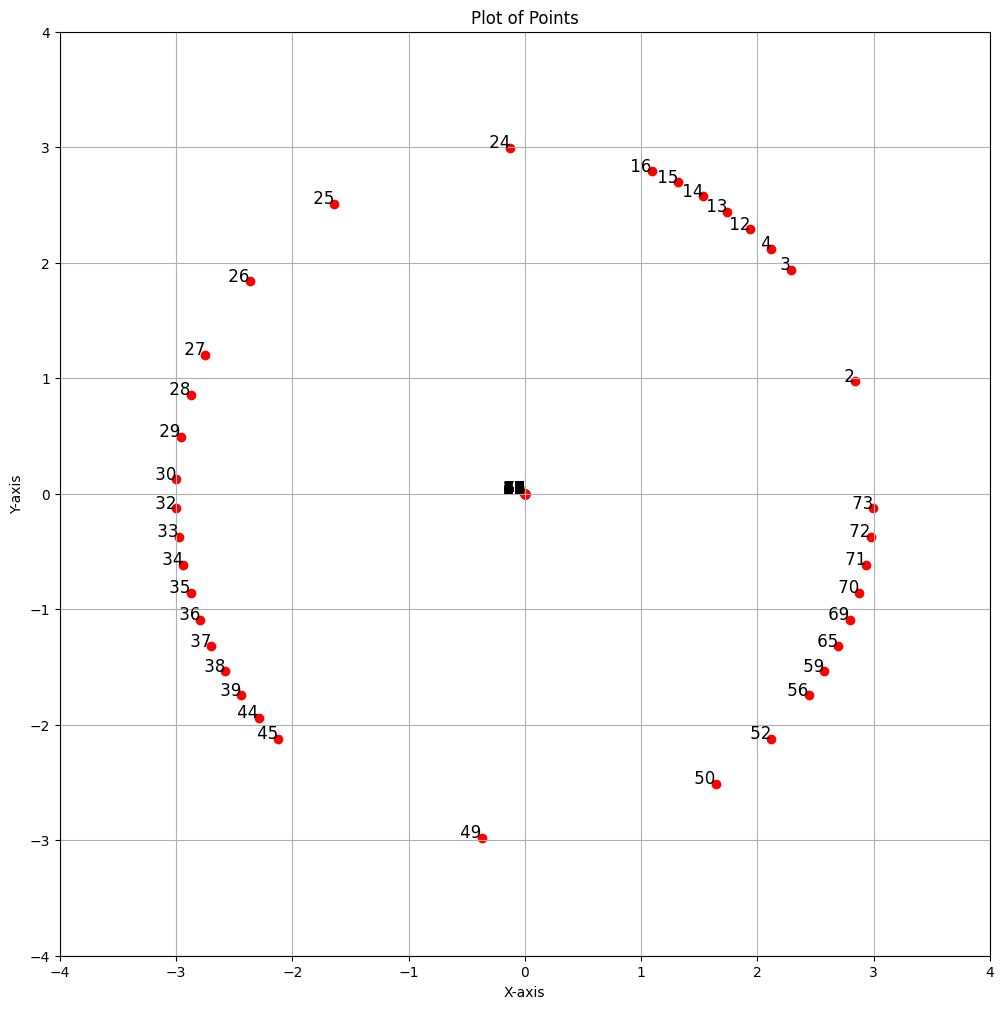

In [27]:
#import matplotlib.pyplot as plt
def f_plot(file):
    ans = radial(file)
    x_coords = [coord[0] for coord in ans.values()]
    y_coords = [coord[1] for coord in ans.values()]

    plt.figure(figsize=(12, 12))
    plt.scatter(x_coords, y_coords, color='red')

    # Add labels for each point
    for point, coord in ans.items():
        plt.text(coord[0], coord[1], f' {point}', fontsize=12, ha='right')
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot of Points')
    plt.grid(True)
    plt.show()

f_plot('example.dot')


# TRASH

In [28]:
def tree(file):#,starting_point):
    graph = get_data(file)
    nodes_ish = graph[0]
    nodes = sorted([int(node.get_name()) for node in nodes_ish])
    #print(nodes)
    edges = graph[1]
    #root = starting_point
    links = f_edges(file)[1]

    tree = {node: [] for node in nodes}
    done_nodes = []
    for child in childs:
        tree[root].append(child)
        done_nodes.add(child)
    #print('root', root,'childs: ', childs)
    # print('done nodes: ',done_nodes)        
    # print('#######')
    while len(done_nodes)!=len(nodes):
        for child1 in childs:
            root = child1
            print('root', root,'childs: ', childs)
            #if root not in done_nodes:
            done_nodes.add(root)
            new_childs = [child2 for child2 in links[root] if child2 not in done_nodes]
            #print('root', root,'childs: ', new_childs)
            if len(new_childs)==1 and new_childs[0] not in done_nodes:
                tree[child1].append(new_childs[0])
                done_nodes.add(new_childs[0])
            
            elif len(new_childs)>1:# and new_childs[0] not in done_nodes:
                for child2 in new_childs:
                    if child2 not in done_nodes:
                        tree[child1].append(child2)
                        done_nodes.add(child2)
        
            # print('done nodes: ',done_nodes)        
            # print('#################')
        yet_to_do_nodes = [node for node in nodes if node not in done_nodes]
        #yet_to_do_nodes = [set(graph[2])-done_nodes]
        root = sorted(list(yet_to_do_nodes))[0]
        done_nodes.add(root)
        childs = links[root]
        #print('root', root,'childs: ', childs)
        #print('#######')
    return tree

ans = tree('Datasets/LesMiserables.dot')#,'1')
print(ans)



KeyboardInterrupt: 

In [ ]:
def tree1(file),starting_point):
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    root = starting_point
    links = f_edges(file)[1]

    tree = {node.get_name(): [] for node in nodes}
    done_nodes = set()
    childs = links[root]
    done_nodes.add(root)
    for child in childs:
        tree[root].append(child)
        done_nodes.add(child)
    print('root', root,'childs: ', childs)
    # print('done nodes: ',done_nodes)        
    # print('#######')
    while len(done_nodes)!=len(nodes):
        for child1 in childs:
            root = child1
            print('root', root,'childs: ', childs)
            #if root not in done_nodes:
            done_nodes.add(root)
            new_childs = [child2 for child2 in links[root] if child2 not in done_nodes]
            #print('root', root,'childs: ', new_childs)
            if len(new_childs)==1 and new_childs[0] not in done_nodes:
                tree[child1].append(new_childs[0])
                done_nodes.add(new_childs[0])
            
            elif len(new_childs)>1:# and new_childs[0] not in done_nodes:
                for child2 in new_childs:
                    if child2 not in done_nodes:
                        tree[child1].append(child2)
                        done_nodes.add(child2)
        
            # print('done nodes: ',done_nodes)        
            # print('#################')
        yet_to_do_nodes = set(graph[2])-done_nodes
        root = sorted(list(yet_to_do_nodes))[0]
        done_nodes.add(root)
        childs = links[root]
        #print('root', root,'childs: ', childs)
        #print('#######')
    return tree

ans = tree('Datasets/LesMiserables.dot','1')




In [ ]:
#ans['11']-f_childs('Datasets/LesMiserables.dot')[1]['11']
l = [i for i in f_childs('Datasets/LesMiserables.dot')[1]['11'] if i not in ans['11']]
missing = [i for i in l if i in f_childs('Datasets/LesMiserables.dot')[1]['11']]
missing

In [ ]:
f_childs('Datasets/LesMiserables.dot')[1]['11'][-15:]

In [ ]:
sum = set()
for node,childs in ans.items():
    #sum.add(node)
    if childs != []:
        sum.add(node)
        print('node',node,'len: ',len(childs),'child: ', childs)
    for child in childs:
        sum.add(child)
check = [i for i in sum]
#print(len(check))
#print('25' in sum)
missing = [i for i in get_data('Datasets/LesMiserables.dot')[2] if i not in check]
missing

In [ ]:
f_edges('Datasets/LesMiserables.dot')[1]['25']

In [ ]:
# graph = get_data('Datasets/LesMiserables.dot')
# nodes = graph[0]
# edges = graph[1]
# len(nodes)

set1 = [1,2,3]
set2 =[3,4,5]
set3=set1-set2
set3

In [ ]:
def tree1(file):
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]

    tree = {node.get_name(): [] for node in nodes}
    sorted_nodes = sort_nodes_degree(file)
    done_nodes = set()
    for node,dest1 in sorted_nodes.items():
        dests = f_edges[dest1][1] #
        if node not in done_nodes:
            done_nodes.add(node) 
            if len(dests)==1 and dests[0] not in done_nodes:
                tree[node].append(dests[0])

            else:   
                for dest in dest1:
                    tree[node]
                    if dest not in done_nodes:
                        done_nodes.add(dest)
                        tree[node] = 




#print(tree('Datasets/LesMiserables.dot'))


# def order_radial(file):
#     tree = {}
#     sorted_nodes = sort_nodes_degree(file)
#     done_nodes = set()
#     for node,childs in sorter_nodes.items():
#         tree[node]


In [ ]:
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4
radius = 2

for node in sorted_node_childs.items():
    #for edge in edges:
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    #for child in
    parent_x = node_positions[str(node[0])][0]
    parent_y = node_positions[str(node[0])][1]
    if int(node_child_count[str(node[0])]) > 1 and node not in done_nodes:#and int(edge.get_destination()) not in done_nodes:
        n_child = int(node_child_count[str(node[0])])
        #print(n_child)
        theta = math.pi/n_child
        angle = theta-theta/2
        for child in sorted_node_childs[node[0]]:
            #print(child)            
            child_x = parent_x + math.cos(angle)*sorted_node_childs[node[0]].index(child)
            child_y = parent_y + math.sin(angle)*sorted_node_childs[node[0]].index(child)
            node_positions_radial[node[0]] = (child_x,child_y)
    #print(node[0])
    #done_nodes.append(node[0])
        #l_parent = node_child_count[str(node[0])]
        #l_child = node_child_count[str(node[0])]
        #theta = min(l_child/(l_parent-1),2*math.acos(radius/(radius+2)))
        #for child in list(sorted_node_childs[node[0]]):
        #    child_x = 
            #print('parent: ', node[0],'child: ',child)
    
    if int(node_child_count[str(node[0])]) <= 1 and node not in done_nodes:
        child_x = parent_x+2
        child_y = parent_y+2
        node_positions_radial[node[0]] = (child_x,child_y)
    done_nodes.append(node[0])
#print(node_positions_radial['11'])
#print(done_nodes)

In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4

for edge,node in zip(edges,sorted_node_childs):
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    parent_x = node_positions[str(edge.get_source())][0]
    parent_y = node_positions[str(edge.get_source())][1]
    if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:
        #print(edge)
        child_x = parent_x + 3
        child_y = parent_y
        node_positions[edge.get_destination()] = (child_x, child_y)
        done_nodes.append(int(edge.get_destination()))
    
    
    elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
        if len(node_childs[str(edge.get_source())])%2 != 0:
            max_y = (node_child_count[str(edge.get_source())]-1)*2
        else:
            max_y = (node_child_count[str(edge.get_source())]-1)*2+1
        for child in node_childs[str(edge.get_source())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -=5
            done_nodes.append(int(edge.get_destination()))











        num_points = node_child_count[edge.get_source()]
        angle_increment = 2 * math.pi / num_points
        x_coords = []
        y_coords = []

    # Calculate coordinates of each point
    for i in range(num_points):
        # Calculate angle for this point
        angle = i * angle_increment
        
        # Calculate coordinates using trigonometry
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        # Add coordinates to the lists
        x_coords.append(x)
        y_coords.append(y)
    
    radius += 2

In [ ]:
# Number of points
num_points = node_child_count[]

# Radius of the circle
radius = 1.0

# Calculate the angle between each point
angle_increment = 2 * math.pi / num_points

# Initialize lists to store the coordinates of the points
x_coords = []
y_coords = []

# Calculate coordinates of each point
for i in range(num_points):
    # Calculate angle for this point
    angle = i * angle_increment
    
    # Calculate coordinates using trigonometry
    x = radius * math.cos(angle)
    y = radius * math.sin(angle)
    
    # Add coordinates to the lists
    x_coords.append(x)
    y_coords.append(y)
for x,y in zip(x_coords,y_coords):
    print(x,y)
# Plot the points on a circle
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue', label='Points')
plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], color='red')  # Connect the last point to the first point
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points on a Circle')
plt.axis('equal')  # Equal aspect ratio for x and y axes
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}

for node in sorted_node_childs:
    num_points = node_child_count[node]
    angle_increment = 2 * math.pi / num_points
    x_coords = []
    y_coords = []

    # Calculate coordinates of each point
    for i in range(num_points):
        # Calculate angle for this point
        angle = i * angle_increment
        
        # Calculate coordinates using trigonometry
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        # Add coordinates to the lists
        x_coords.append(x)
        y_coords.append(y)
    
    radius += 2

In [ ]:
#'Datasets/LesMiserables.dot'
import networkx as nx
import math

# Load the .dot file
dot_file_path = 'Datasets/LesMiserables.dot'

# Read the .dot file
G = nx.drawing.nx_pydot.read_dot(dot_file_path)

# Calculate node degrees
node_degrees = dict(G.degree())
node_positions = {node.get_name(): (0, 0) for node in nodes}

# Calculate radial positions based on node degrees
max_degree = max(node_degrees.values())
radius_scale = 10  # Adjust this value as needed
node_positions = {}
for node, degree in node_degrees.items():
    radius = degree * radius_scale / max_degree
    theta = 2 * math.pi * (node_degrees[node] / len(G))
    node_positions[node] = {'r': radius, 'theta': theta}

# Generate .dot file with calculated node positions
with open('radial_layout.dot', 'w') as dot_file:
    dot_file.write('graph {\n')
    for node, pos in node_positions.items():
        r = pos['r']
        theta = pos['theta']
        x = r * math.cos(theta)
        y = r * math.sin(theta)
        dot_file.write(f'    {node} [pos="{x},{y}!"];\n')
    
    # Write edges to the .dot file
    for edge in G.edges():
        dot_file.write(f'    {edge[0]} -- {edge[1]};\n')
    
    dot_file.write('}\n')

#plt.figure(figsize=(100, 100))
for node, pos in node_positions.items():
    x = pos['r'] * math.cos(pos['theta'])
    y = pos['r'] * math.sin(pos['theta'])
    plt.scatter(x, y, label=node, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Radial Layout of Nodes')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('radial_plot.png')
plt.show()

    




In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
def plot_radial_layout(nodes):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node,childs in nodes.items():
        if len(childs) != 0:
            num_points = node_child_count[node]
            theta = 2 * math.pi / num_points
            ax.plot(theta, radius, 'o') #plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            # Draw edges
            for child in list(childs):
                i = childs.index(child)
                angle = i * angle_increment
                
                child_x, child_y = radius * math.cos(angle),radius * math.sin(angle)
                child_radius, child_theta = child_x, child_y
                ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout(sorted_node_childs)

In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
def plot_radial_layout2(nodes):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node in nodes:
        n_childs = node_child_count[node]
        if int(n_childs) != 0:
            num_points = int(n_childs)
            theta = 2 * math.pi / num_points
            ax.plot(theta, radius, 'o') #plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            x_parent = math.cos(theta)*radius
            y_parent = math.sin(theta)*radius
            # Draw edges
            for child in node_childs[node]:
                i = node_childs[node].index(child)
                angle = i * angle_increment
                
                child_x, child_y = radius * math.cos(angle),radius * math.sin(angle)
                child_radius, child_theta = child_x, child_y
                ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout2(sorted_node_childs)

### Trash-ish for tree layout

In [ ]:
node_positions = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4

for edge in edges:
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    parent_x = node_positions[str(edge.get_source())][0]
    parent_y = node_positions[str(edge.get_source())][1]
    if len(node_childs[str(edge.get_source())]) == 1:# and int(edge.get_destination()) not in done_nodes:
        #print(edge)
        child_x = parent_x + 3
        child_y = parent_y
        node_positions[edge.get_destination()] = (child_x, child_y)
        done_nodes.append(int(edge.get_destination()))
    
    
    elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
        if len(node_childs[str(edge.get_source())])%2 != 0:
            max_y = (node_child_count[str(edge.get_source())]-1)*2
        else:
            max_y = (node_child_count[str(edge.get_source())]-1)*2+1
        for child in node_childs[str(edge.get_source())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -=5
            done_nodes.append(int(edge.get_destination()))
print(node_positions)

In [ ]:
def tree_layout(file):
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    
    for edge in edges:
        #print(edge)#.get_source())
    #    print(node_childs[str(edge.get_destination())])
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        node_child_count = f_childs(file)[0]
        node_childs = f_childs(file)[1]
        if len(node_childs[str(edge.get_source())]) == 1:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            step = 3#random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
        
        
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                step = 3#random.choice([2,3])
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
        
        elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
            child_x += 1
    return node_positions

print(tree_layout('Datasets/LesMiserables.dot'))
#f_childs(nodes,edges)[1]['17']

### Trash-ish for radial layout

In [ ]:
#new_file = write_ordered_dic('Datasets/LesMiserables.dot')

def radial1(file,ordered = False):
    # total = 0
    # n=0
    # graph = get_data(file)
    # nodes = graph[0]
    # edges = graph[1]
    # node_positions = {node.get_name(): (0, 0) for node in nodes}
    # done_nodes= []
    # node_child_count = f_childs(file)[0]
    # node_childs = f_childs(file)[1]
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    radius = 3
    angle = 360/3
    for node in tree:
        childs = tree[str(node)]
        #print('node: ', node, 'childs: ', childs)
        parent_x = node_positions[node][0]
        parent_x = node_positions[node][1]
        increment = 360/len(childs)
        num_childs = len(childs)
        angle = 0
        for child in childs:
            angle += increment
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius

            node_positions[child]=(child_x,child_y)
            
        radius += 2
    return node_positions

ans = radial('example.dot')

In [ ]:
def plot_radial_layout11(nodes, center_x, center_y):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    # Plot node and edges
    for node, childs in nodes.items():
        
        if len(childs) != 0:
            num_points = len(childs)
            theta = 2 * math.pi / num_points
            node_x, node_y = radius * math.cos(theta), radius * math.sin(theta)
            ax.plot(theta, radius, 'o')  # Plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            # Draw edges
            
            for child in childs:
                angle = math.atan2(int(child[1]), int(child[0]))  # Calculate angle from child to center
                child_radius = math.sqrt(int(child[0])**2 + int(child[1])**2)  # Calculate radius from child to center
                ax.plot([theta, angle], [radius, child_radius], 'k-', linewidth=0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
center_x = 0  # Example center x-coordinate
center_y = 0  # Example center y-coordinate
plot_radial_layout(sorted_node_childs, center_x, center_y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the new center coordinates (theta, r)
center_theta = np.pi / 4  # Example angle (in radians)
center_r = 4.0  # Example radial distance

# Generate some sample data
#theta = np.linspace(0, 2 * np.pi, 100)
#r = np.sin(2 * theta)

# Plot the data with the new center
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Shift the center of the polar plot
ax.set_theta_zero_location('N')  # Set the zero angle to North (upward)
ax.set_theta_direction(-1)  # Set the direction of increasing angle counter-clockwise
ax.plot(theta + center_theta, r, color='blue')  # Plot the data with the new center
ax.scatter(center_theta, center_r, color='red')  # Plot the new center point
ax.set_rmax(center_r + 1)  # Adjust radial limits if necessary

plt.show()


In [ ]:
#HOW TO PLOT A GENERAL GRAPH
for edge in edges:
    start_node = edge.get_source()
    end_node = edge.get_destination()
    start_pos = node_positions[start_node]
    end_pos = node_positions[end_node]
    position = str(str(edge.get_attributes())).rfind(':')
    if int(position) != -1:
        w = int(str(edge.get_attributes())[position+3:-2])
        if w != 1:
            w = 1+w/10
    else:
        w=1
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w) 

# Draw nodes
for node, pos in node_positions.items():
    plt.plot(pos[0], pos[1], 'ro',markersize=10)  # 'ro' is red circle
    plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')

# Set plot limits
#plt.xlim(-0.5, 3.5)
#plt.ylim(-1.5, 1.5)

# Turn off axis
#plt.axis('off')

plt.savefig('plots/plot.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#def cartesian_to_polar(x, y):
#    radius = np.sqrt(x**2 + y**2)
#    theta = np.arctan2(y, x)
#    return radius, theta

def plot_radial_layout(node_positions, node_childs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node, (x, y) in node_positions.items():
        radius, theta = x, y
        ax.plot(theta, radius, 'o') #plot node
        ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
        # Draw edges
        for child in node_childs[node]:
            child_x, child_y = node_positions[child]
            child_radius, child_theta = child_x, child_y
            ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout(node_positions, node_childs)


### Sort the nodes based on the number of childs

In [ ]:
sorted_node_child_count = sorted_dict = dict(sorted(node_childs.items(), key=lambda item: len(item[1]), reverse=True))

def plot_radial_layout (sorted_node_child_count, node_childs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node, (x, y) in sorted_node_child_count.items():
        radius, theta = x, y
        ax.plot(theta, radius, 'o') #plot node
        ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
        # Draw edges
        for child in node_childs[node]:
            child_x, child_y = sorted_node_child_count[child]
            child_radius, child_theta = child_x, child_y
            ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout (sorted_node_child_count, node_childs)

# General Code

In [ ]:
print(edges.get_values())
#for node in nodes:
 #   print("Node name:", node.get_name())
  #  print("Node label:", node.get_label())
   # print("Node attributes:", node.get_attributes())
    #print("Node shape:", node.get_shape())
    #print("Node style:", node.get_style())
    #print("Node position:", node.get_pos())
    
    
#for edge in edges:
 #   print("Source:", edge.get_source())
  #  print("Destination:", edge.get_destination())
    #print("Edge attributes:", edge.get_attributes())
    #position = str(str(edge.get_attributes())).rfind(':')
    #w = str(edge.get_attributes())[position+3:-2]
    #print(w)
    #print("Edge style:", edge.get_style())
    #print("Edge label:", edge.get_label())
    #print("Edge color:", edge.get_color())

# TRASH

In [ ]:
#HOW TO PLOT A GENERAL GRAPH
for edge in edges:
    start_node = edge.get_source()
    end_node = edge.get_destination()
    start_pos = node_positions_radial[start_node]
    end_pos = node_positions_radial[end_node]

    position = str(str(edge.get_attributes())).rfind(':')
    if int(position) != -1:
        w = int(str(edge.get_attributes())[position+3:-2])
        if w != 1:
            w = 1+w/10
    else:
        w=1
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w) 

# Draw nodes
for node, pos in node_positions_radial.items():
    plt.plot(pos[0], pos[1], 'ro',markersize=10)  # 'ro' is red circle
    plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')

plt.savefig('radial_plot.png')
plt.show()

In [ ]:
#IGNORE: TREE WITH NODES
node_positions = {node.get_name(): (0, 0) for node in nodes}
#node_positions['1'] = (0, 0)
lonely_nodes = 

for node in nodes:
    max_y = node_child_count[str(node.get_name())]-1
    
    parent_x = node_positions[str(node.get_name())][0]
    parent_y = node_positions[str(node.get_name())][1]
    if len(node_childs[str(node.get_name())]) == 1:
        
        child_x = parent_x + 2
        child_y = parent_y  # Assuming you want to keep the same y-coordinate
        node_positions[child] = (child_x, child_y)
    
    elif len(node_childs[str(node.get_name())]) == 0:
        
    else:
        for child in node_childs[str(node.get_name())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -= 2
    #print(max_distance)
            
            
print(node_positions) 

In [ ]:
#COUNT THE NUMBER OF EDGES OF EACH NODE
node_edge_count = {node.get_name(): 0 for node in nodes}

for edge in graph[0].get_edges():
    s = edge.get_source()
    d = edge.get_destination()
    if s in node_edge_count:
        node_edge_count[s] += 1
    if d in node_edge_count:
        node_edge_count[d] += 1

for node_name, edge_count in node_edge_count.items():
    print("Node:", node_name, ", Number of edges:", edge_count)

In [ ]:
#HOW TO CREATE THE DEFAULT LAYOUT

with open(dot_file_path, 'r') as dot_file:
    dot_data = dot_file.read()

# Create a graph object from the .dot data
graph = pydot.graph_from_dot_data(dot_data)

# Set the layout algorithm to "dot" (or any other supported layout type)
graph[0].set_graph_defaults(layout="dot")

# Render the graph with Graphviz
output_file_path = 'dot_layout_graph.png'
graph[0].write_png(output_file_path)

print("Graph with dot layout saved as:", output_file_path)

In [ ]:
#HOW TO CREATE THE RADIAL LAYOUT
graph[0].set_graph_defaults(layout="twopi")
output_file_path = 'radial_graph.png'
graph[0].write_png(output_file_path)